In [15]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import toad as td

import warnings
warnings.simplefilter("ignore")

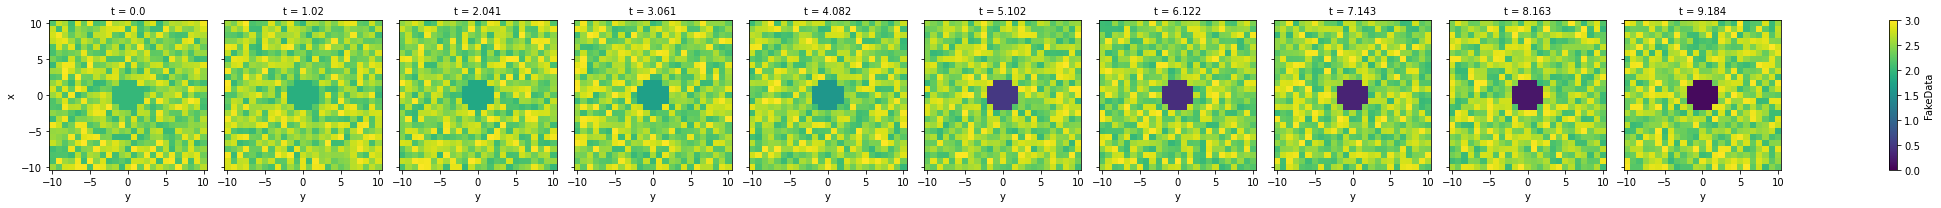

In [3]:
nx, ny, nt = 25,25,50
xvals = np.linspace(-10,10,nx)
yvals = np.linspace(-10,10,ny)
tvals = np.linspace(0,10,nt)

X,Y = np.meshgrid(xvals, yvals)
data = 2 + np.random.random(size=(nx,ny,nt))

blobregion = np.sqrt(X**2+Y**2)<2
heaviside = np.vectorize(lambda t: (0. if t<0.5 else 1))
data[blobregion] = 2 - heaviside(np.linspace(0,1,nt)) - np.linspace(0,1,nt)

dataset = xr.DataArray(
    data = data,
    coords = {
        'x':xvals, 
        'y':yvals, 
        't':tvals},
    name='FakeData'
).to_dataset()

dataset.FakeData.isel(t=slice(0,nt,5)).plot(col='t', vmin=0, vmax=3)

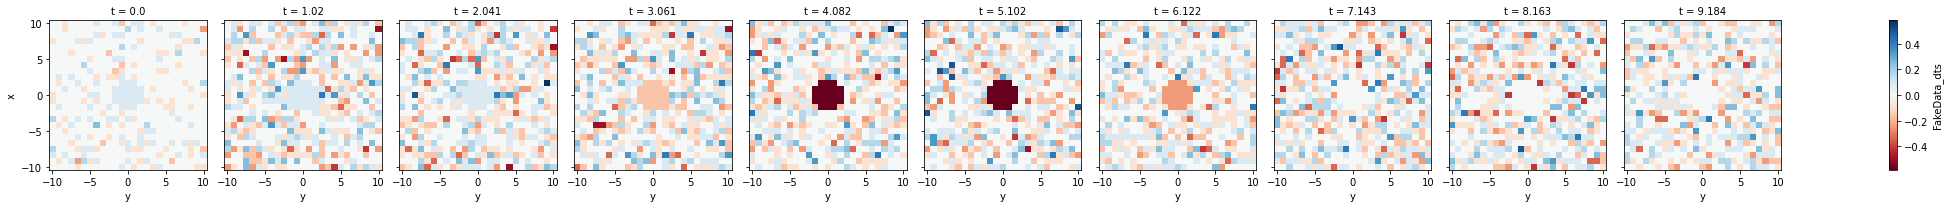

In [4]:
dataset_with_dts = td.detect(
    data = dataset,
    var = 'FakeData',
    temporal_dim = 't',
    method = 'asdetect'
)

dataset_with_dts.FakeData_dts.isel(t=slice(0,nt,5)).plot(col='t', cmap='RdBu')

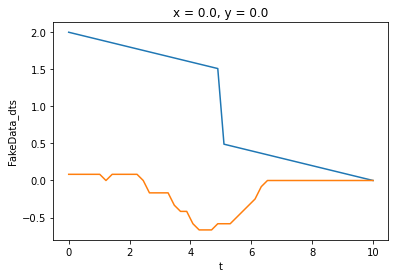

In [5]:
dataset_with_dts.FakeData.sel(x=0, y=0, method='nearest').plot()
dataset_with_dts.FakeData_dts.sel(x=0, y=0, method='nearest').plot()

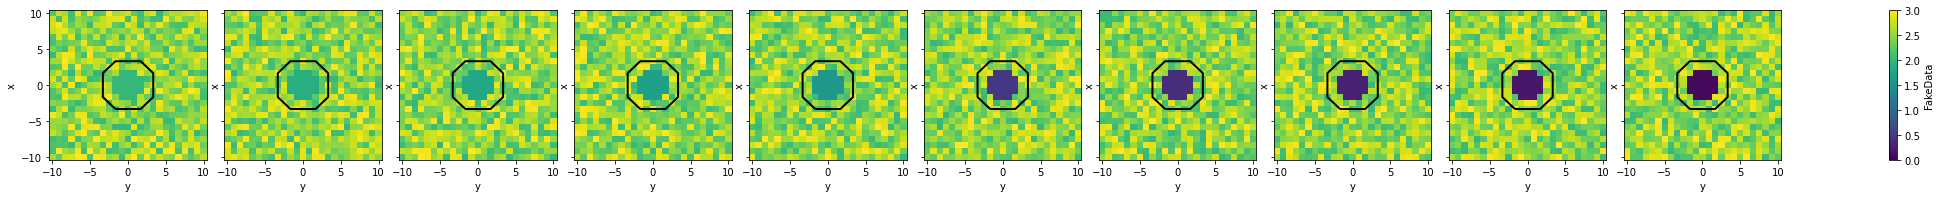

In [16]:
dataset_with_clusters = td.cluster(
    data = dataset_with_dts,
    var = 'FakeData',
    method = 'dbscan',
    method_kwargs = dict(eps=0.2, min_samples=10)
)

clustered = (dataset_with_clusters.FakeData_cluster == 0)

facets = dataset.FakeData.isel(t=slice(0,nt,5)).plot(col='t', vmin=0, vmax=3)
for ax in facets.axes[0]:
    clustered.any(dim='t').plot.contour(levels=2, colors='black', linewidths=2, ax=ax)